## Testing sysmonitor log

In [3]:
sys_test_df = pd.read_csv("dataset/imgs_2021070511352146227/testset/sysmonitor_test.csv")
sys_test_df = pd.read_csv("dataset/imgs_2021070511352146227/trainset/sysmonitor_train.csv")

In [6]:
# Creating word vectors for testset
doc2vec_test = Doc2VecTransformer(vector_size=50)
doc2vec_test.fit(sys_test_df)
doc2vec_test_vecs = doc2vec_test.transform(sys_test_df)

100%|██████████| 1592/1592 [00:00<00:00, 1435368.01it/s]


In [8]:
from sklearn.neural_network import MLPRegressor

auto_encoder = MLPRegressor(hidden_layer_sizes=(
                                                 50,
                                                 30,
                                                 50,
                                               ))
auto_encoder.fit(doc2vec_test_vecs, doc2vec_test_vecs)
predicted_vectors = auto_encoder.predict(doc2vec_test_vecs)

In [9]:
print(predicted_vectors)
# auto_encoder_model.score(predicted_vectors, doc2vec_vectors)
auto_encoder.score(predicted_vectors, doc2vec_test_vecs)

[[ 0.00176467  0.0029584  -0.0039082  ... -0.00113453  0.00372303
   0.00054587]
 [ 0.00204936  0.00298442 -0.00332616 ... -0.00173061  0.00461394
  -0.00032111]
 [ 0.00297434 -0.00039169 -0.00121436 ... -0.00201641  0.00285929
   0.00313636]
 ...
 [ 0.00482398  0.00063436 -0.00105441 ... -0.00114198  0.00200063
   0.00042189]
 [ 0.00204936  0.00298442 -0.00332616 ... -0.00173061  0.00461394
  -0.00032111]
 [ 0.00176467  0.0029584  -0.0039082  ... -0.00113453  0.00372303
   0.00054587]]


0.6970810894138829

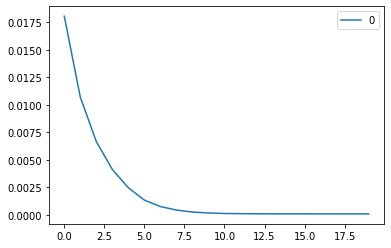

In [10]:
pd.DataFrame(auto_encoder.loss_curve_).plot()

In [22]:
from scipy.spatial.distance import cosine
def key_consine_similarity(tupple):
    return tupple[1]

def get_computed_similarities(doc2vec_vectors, predicted_vectors, reverse=False):
    data_size = len(sys_test_df)
    cosine_similarities = []
    for i in range(data_size):
        cosine_sim_val = (1 - cosine(doc2vec_vectors[i], predicted_vectors[i]))
        cosine_similarities.append((i, cosine_sim_val))

    return sorted(cosine_similarities, key=key_consine_similarity, reverse=reverse)

cosine_list=[]
def display_top_n(sorted_cosine_similarities, n=100):
    for i in range(n):
        index, consine_sim_val = sorted_cosine_similarities[i]
        print('timeStamp: ', sys_test_df.iloc[index, 0])  
        print('Cosine Sim Val :', consine_sim_val)
        print('---------------------------------')
        cosine_list.append((sys_test_df.iloc[index, 0], consine_sim_val))

In [23]:
print('Top 100 unique logs')
sorted_cosine_similarities = get_computed_similarities(doc2vec_vectors=doc2vec_test_vecs, predicted_vectors=predicted_vectors)
display_top_n(sorted_cosine_similarities=sorted_cosine_similarities)

Top 100 unique logs
timeStamp:  5398169
Cosine Sim Val : -0.25689899921417236
---------------------------------
timeStamp:  5398492
Cosine Sim Val : -0.25689899921417236
---------------------------------
timeStamp:  5398867
Cosine Sim Val : -0.25689899921417236
---------------------------------
timeStamp:  5399219
Cosine Sim Val : -0.2226136028766632
---------------------------------
timeStamp:  5396619
Cosine Sim Val : -0.20207539200782776
---------------------------------
timeStamp:  5398347
Cosine Sim Val : -0.20207539200782776
---------------------------------
timeStamp:  5399117
Cosine Sim Val : -0.20042312145233154
---------------------------------
timeStamp:  5399118
Cosine Sim Val : -0.20042312145233154
---------------------------------
timeStamp:  5396634
Cosine Sim Val : -0.1817428469657898
---------------------------------
timeStamp:  5396914
Cosine Sim Val : -0.1817428469657898
---------------------------------
timeStamp:  5397116
Cosine Sim Val : -0.1817428469657898
------

In [24]:
cosine_list

[(5398169, -0.25689899921417236),
 (5398492, -0.25689899921417236),
 (5398867, -0.25689899921417236),
 (5399219, -0.2226136028766632),
 (5396619, -0.20207539200782776),
 (5398347, -0.20207539200782776),
 (5399117, -0.20042312145233154),
 (5399118, -0.20042312145233154),
 (5396634, -0.1817428469657898),
 (5396914, -0.1817428469657898),
 (5397116, -0.1817428469657898),
 (5397474, -0.1817428469657898),
 (5397956, -0.1817428469657898),
 (5396457, -0.1120581179857254),
 (5396532, -0.1120581179857254),
 (5396592, -0.1120581179857254),
 (5396652, -0.1120581179857254),
 (5396659, -0.1120581179857254),
 (5396712, -0.1120581179857254),
 (5396840, -0.1120581179857254),
 (5396847, -0.1120581179857254),
 (5396907, -0.1120581179857254),
 (5397035, -0.1120581179857254),
 (5397223, -0.1120581179857254),
 (5397283, -0.1120581179857254),
 (5397290, -0.1120581179857254),
 (5397343, -0.1120581179857254),
 (5397350, -0.1120581179857254),
 (5397418, -0.1120581179857254),
 (5397478, -0.1120581179857254),
 (5

In [20]:
sys_pd=pd.read_csv("dataset/imgs_2021070511352146227/sys_result_format.csv")

In [21]:
sys_pd.columns

Index(['LogName', 'TimeSlice', 'Label'], dtype='object')

In [35]:
if i in sys_pd.index:
    print(sys_pd['TimeSlice'][i])

NameError: name 'i' is not defined